In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2926,ham,Ok... U enjoy ur shows...,NaN,NaN,NaN
4394,ham,"Only just got this message, not ignoring you. ...",NaN,NaN,NaN
3306,ham,Set a place for me in your heart and not in yo...,NaN,NaN,NaN
4491,ham,Probably a couple hours tops,NaN,NaN,NaN
2503,ham,Fwiw the reason I'm only around when it's time...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [ ]:
#DATA CLEANING 
#EDA
#TEXT PREPROCESSING (Stemming and vectorization and stopwords)
#MODEL BUILDING
#EVALUATION
#DEPLOY

# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1310,ham,"I.ll always be there, even if its just in spir..."
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can..."
3115,ham,Uncle Abbey! Happy New Year. Abiola
4221,ham,Yo you around? A friend of mine's lookin to pi...
2299,spam,Congrats! 1 year special cinema pass for 2 is ...


In [9]:
df = df.rename(columns={'v1':'Result', 'v2': 'Emails'})
df.sample(5)

,Result,Emails
1062,ham,Ok. Not sure what time tho as not sure if can ...
5325,ham,Gal n boy walking in d park. gal-can i hold ur...
285,ham,"K, I might come by tonight then if my class le..."
4849,ham,Maybe you should find something else to do ins...
3069,ham,I'm now but have to wait till 2 for the bus to...


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Result' column
df['Encoded_Result'] = encoder.fit_transform(df['Result'])

# If you want 'ham' to be 0 and 'spam' to be 1, you can skip the mapping step
# because LabelEncoder automatically assigns 'ham' = 0 and 'spam' = 1

print(df.head())


  Result                                             Emails  Encoded_Result
0    ham  Go until jurong point, crazy.. Available only ...               0
1    ham                      Ok lar... Joking wif u oni...               0
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...               1
3    ham  U dun say so early hor... U c already then say...               0
4    ham  Nah I don't think he goes to usf, he lives aro...               0


In [11]:
#check for duplicates value
df.duplicated().sum()

403

In [12]:
#removal
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

# EDA

In [15]:
df.head()

,Result,Emails,Encoded_Result
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
df['Result'].value_counts()

Result
ham     4516
spam     653
Name: count, dtype: int64

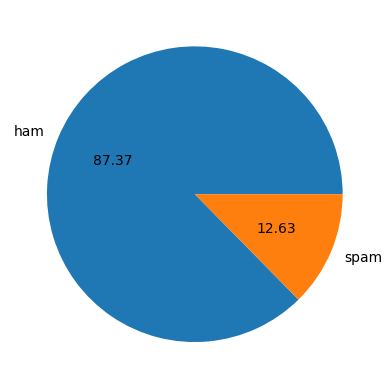

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Result'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#data imbalanced

In [20]:
import nltk

# Download the 'punkt' tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\siddiqui taj
[nltk_data]     2024\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['Emails'].apply(len)

In [27]:
df.head()

,Result,Emails,Encoded_Result,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

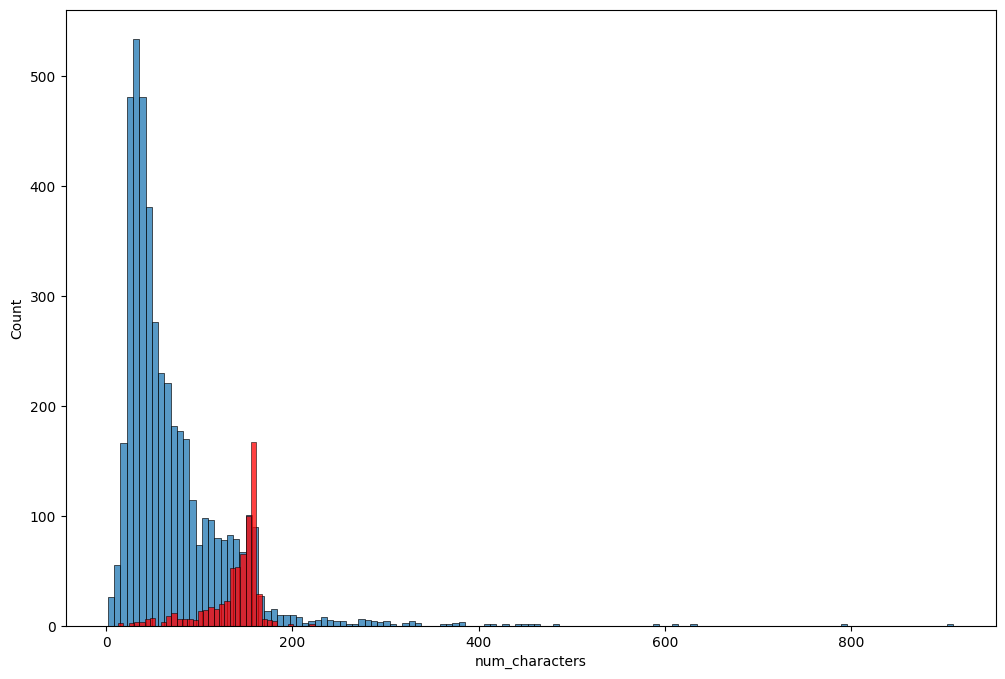

In [31]:

plt.figure(figsize=(12,8))
sns.histplot(df[df['Encoded_Result'] == 0]['num_characters'])
sns.histplot(df[df['Encoded_Result'] == 1]['num_characters'],color='red')

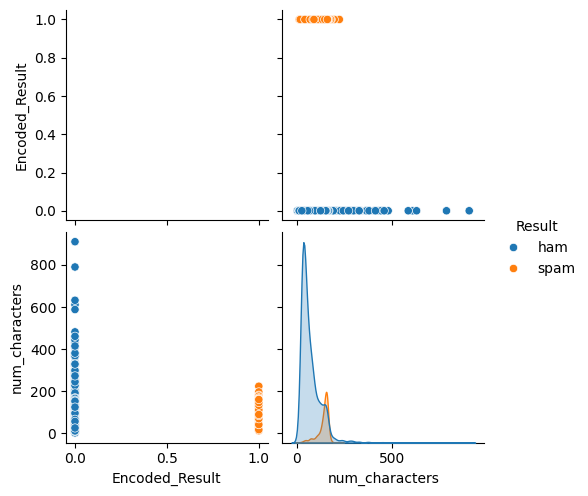

In [32]:
sns.pairplot(df,hue='Result')

# DATA PREPROCESSING

In [ ]:
'''
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming
'''

In [37]:
df['Emails'][1356]

'U ned to convince him tht its not possible witot hurting his feeling its the main'

In [38]:
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Initialize the PorterStemmer
ps = PorterStemmer()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

def transform_text_spacy(text):
    # Process the text with spaCy
    doc = nlp(text.lower())

    # Initialize an empty list to store tokens
    y = []
    
    # Iterate through the tokens in the doc
    for token in doc:
        # Check if the token is alphanumeric (removes special characters)
        if token.text.isalnum():
            y.append(token.text)
            
    text = y[:]
    y.clear()
    
    # Remove stop words and punctuation
    for token in text:
        if token not in stop_words and token not in string.punctuation:
            y.append(token)

    text = y[:]
    y.clear()

    # Apply stemming
    for token in text:
        y.append(ps.stem(token))
        
    return " ".join(y)

# Test the function
print(transform_text_spacy('URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09058094455 from land line. Claim 3030. Valid 12hrs only'))


urgent mobil number award 2000 prize guarante call 09058094455 land line claim 3030 valid 12hr


In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
df['transformed_text'] = df['Emails'].apply(transform_text_spacy)

In [43]:
df.head()

,Result,Emails,Encoded_Result,num_characters,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['Encoded_Result'] == 1]['transformed_text'].str.cat(sep=" "))

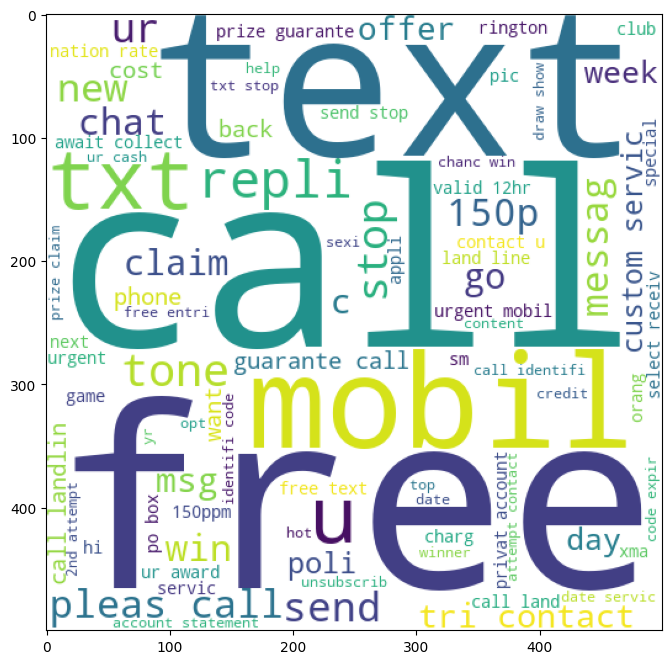

In [57]:
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['Encoded_Result'] == 0]['transformed_text'].str.cat(sep=" "))

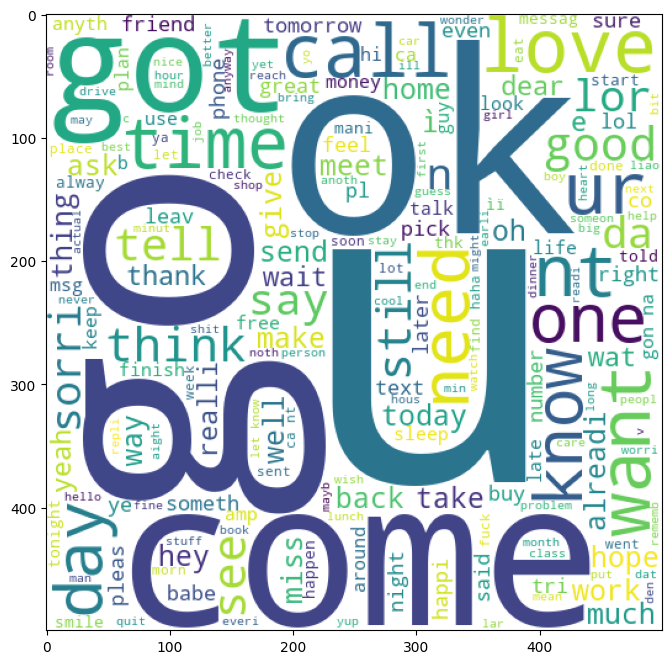

In [60]:
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)

In [61]:
df.head()

,Result,Emails,Encoded_Result,num_characters,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goe usf live around though


In [72]:
spam_corpus = []
for msg in df[df['Encoded_Result'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [73]:
len(spam_corpus)

10306

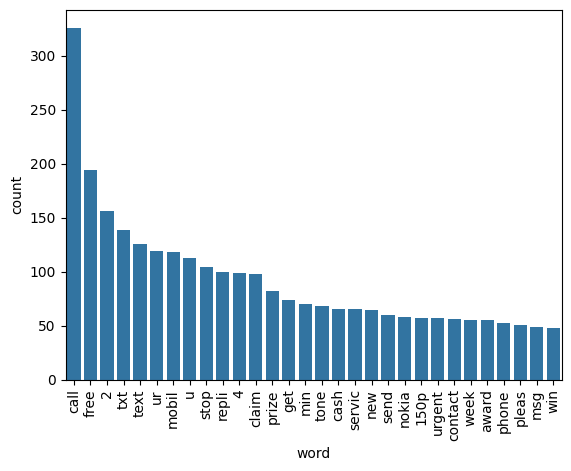

In [76]:
# Calculate the most common words in the spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plotting the barplot
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
ham_corpus = []
for msg in df[df['Encoded_Result'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [79]:
len(ham_corpus)

34757

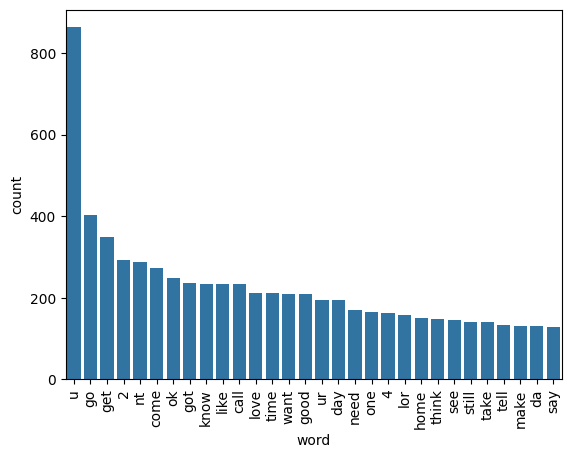

In [80]:
# Calculate the most common words in the spam_corpus
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plotting the barplot
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

# MODEL TRAINING 

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [82]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
X.shape

(5169, 3000)

In [85]:
y = df['Result'].values

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [89]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_score
gnb.fit(X_train,y_train)
# Convert 'ham' to 0 and 'spam' to 1 using NumPy
y_test_binary = np.where(y_test == 'ham', 0, 1)
y_pred1_binary = np.where(y_pred1 == 'ham', 0, 1)

print(accuracy_score(y_test_binary, y_pred1_binary))
print(precision_score(y_test_binary, y_pred1_binary))


0.8529980657640233
0.47058823529411764


In [103]:
mnb.fit(X_train,y_train)
# Convert 'ham' to 0 and 'spam' to 1 using NumPy
y_test_binary = np.where(y_test == 'ham', 0, 1)
y_pred2_binary = np.where(y_pred2 == 'ham', 0, 1)

print(accuracy_score(y_test_binary, y_pred2_binary))
print(precision_score(y_test_binary, y_pred2_binary))

0.9729206963249516
1.0


In [105]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))